In [791]:
import dask.dataframe as dd
shop_df=dd.read_csv('shop_calculated.csv')
fids_df=dd.read_csv('second_table_v1.csv')
east_df=dd.read_csv('east_calculated.csv')
west_df=dd.read_csv('west_calculated.csv')


In [793]:
print(shop_df.dtypes)

CLIMAC                      string[pyarrow]
WINDOW_START_DATE           string[pyarrow]
SHA_TOTAL_TIME_IN_MINUTE            float64
SHA_CATEGORY                string[pyarrow]
dtype: object


In [795]:
two_merged_df= dd.merge(shop_df,east_df,how='outer', on=['CLIMAC','WINDOW_START_DATE'])

In [797]:
three_merged_df=dd.merge(two_merged_df,west_df,how='outer', on=['CLIMAC','WINDOW_START_DATE'])

In [799]:
four_merged_df=dd.merge(three_merged_df,fids_df,how='outer', on=['CLIMAC','WINDOW_START_DATE'])

In [801]:
print(four_merged_df.dtypes)

CLIMAC                           string[pyarrow]
WINDOW_START_DATE                string[pyarrow]
SHA_TOTAL_TIME_IN_MINUTE                 float64
SHA_CATEGORY                     string[pyarrow]
SHA_EAST_TOTAL_TIME_IN_MINUTE            float64
SHA_EAST_CATEGORY                string[pyarrow]
SHA_WEST_TOTAL_TIME_IN_MINUTE            float64
SHA_WEST_CATEGORY                string[pyarrow]
FIDS_TOTAL_TIME_IN_MINUTE                float64
FIDS_CATEGORY                    string[pyarrow]
FIDS_SPECIAL_CATEGORY            string[pyarrow]
dtype: object


In [803]:
four_merged_df.head()

CLIMAC WINDOW_START_DATE  SHA_TOTAL_TIME_IN_MINUTE SHA_CATEGORY  \
0  02:2e:d9:ea:39:5f        2024-06-01                     199.5         120+   
1  02:40:f6:82:4d:cc        2024-06-01                      21.5        15-30   
2  02:8f:0d:bd:15:cf        2024-06-01                      57.5        30-60   
3  04:8c:9a:d0:f2:b1        2024-06-02                      41.0        30-60   
4  04:b1:a1:9a:af:c7        2024-06-01                      17.5        15-30   

   SHA_EAST_TOTAL_TIME_IN_MINUTE SHA_EAST_CATEGORY  \
0                            2.5              0-15   
1                            5.5              0-15   
2                           21.0             15-30   
3                            7.5              0-15   
4                           11.0              0-15   

   SHA_WEST_TOTAL_TIME_IN_MINUTE SHA_WEST_CATEGORY  FIDS_TOTAL_TIME_IN_MINUTE  \
0                          193.5              120+                        2.5   
1                           17.5             15-30                       10.5   
2                           36.0             30-60                        0.5   
3                           33.5             30-60                        1.0   
4                            4.0              0-15                        4.0   

  FIDS_CATEGORY FIDS_SPECIAL_CATEGORY  
0          0-15                   0-5  
1          0-15                 10-15  
2          0-15                   0-5  
3          0-15                   0-5  
4          0-15                   0-5

In [805]:
four_merged_df.compute().shape

(61359, 11)

In [753]:
four_merged_df= four_merged_df.fillna(0)

In [755]:
four_merged_df.compute().shape

(106485, 11)

In [757]:
four_merged_df.head()

CLIMAC WINDOW_START_DATE  SHA_TOTAL_TIME_IN_MINUTE SHA_CATEGORY  \
0  00:00:81:9e:f9:32        2024-05-25                      17.5        15-30   
1  00:08:22:0c:b5:fb        2024-05-30                       5.5         0-15   
2  00:08:22:18:18:fc        2024-05-25                      59.5        30-60   
3  00:08:22:18:a9:fb        2024-06-01                      13.5         0-15   
4  00:08:22:24:a3:fb        2024-05-24                      25.0        15-30   

   SHA_EAST_TOTAL_TIME_IN_MINUTE SHA_EAST_CATEGORY  \
0                           18.0             15-30   
1                            5.5              0-15   
2                           11.5              0-15   
3                            9.0              0-15   
4                           24.0             15-30   

   SHA_WEST_TOTAL_TIME_IN_MINUTE SHA_WEST_CATEGORY  FIDS_TOTAL_TIME_IN_MINUTE  \
0                            0.0                 0                        1.0   
1                            0.0                 0                        1.0   
2                           11.0              0-15                        1.0   
3                            4.0              0-15                        1.5   
4                            0.0                 0                        1.0   

  FIDS_CATEGORY FIDS_SPECIAL_CATEGORY  
0          0-15                   0-5  
1          0-15                   0-5  
2          0-15                   0-5  
3          0-15                   0-5  
4          0-15                   0-5

In [50]:
four_merged_df.compute().to_csv('task_2.csv',index=False)

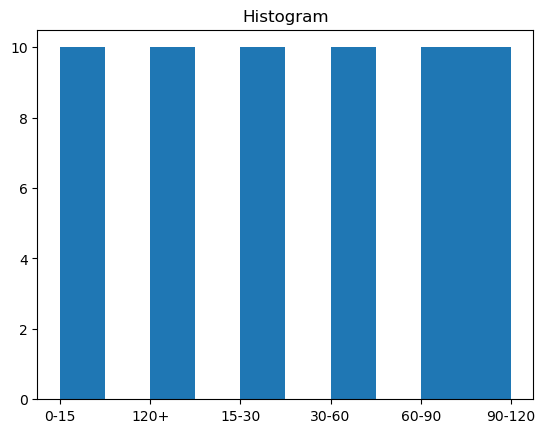

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
 
 
# reading the database
data = pd.read_csv("task_2.csv")
data_grouped = data.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index()

# histogram of total_bills
plt.hist(data_grouped['FIDS_CATEGORY'])
 
plt.title("Histogram")
 
# Adding the legends
plt.show()

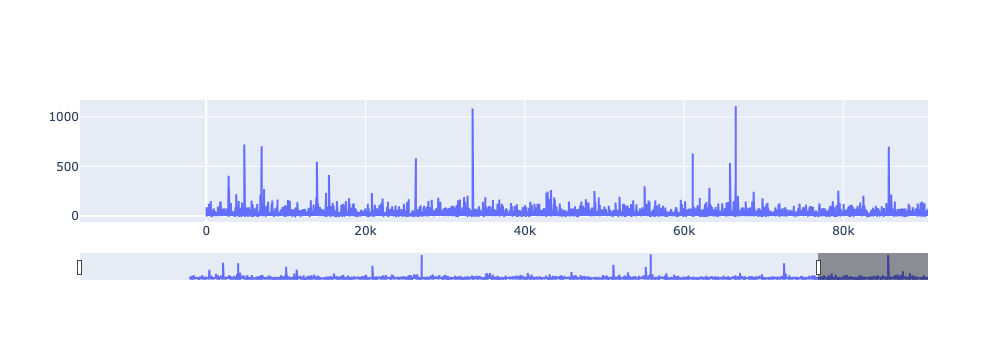

In [68]:
import plotly.graph_objects as px
import pandas as pd

# reading the database
data = pd.read_csv("task_2.csv")

plot = px.Figure(data=[px.Scatter(
	y=data['FIDS_TOTAL_TIME_IN_MINUTE'],
	mode='lines',)
])

plot.update_layout(
	xaxis=dict(
		rangeselector=dict(
			buttons=list([
				dict(count=1,
					step="day",
					stepmode="backward"),
			])
		),
		rangeslider=dict(
			visible=True
		),
	)
)

plot.show()


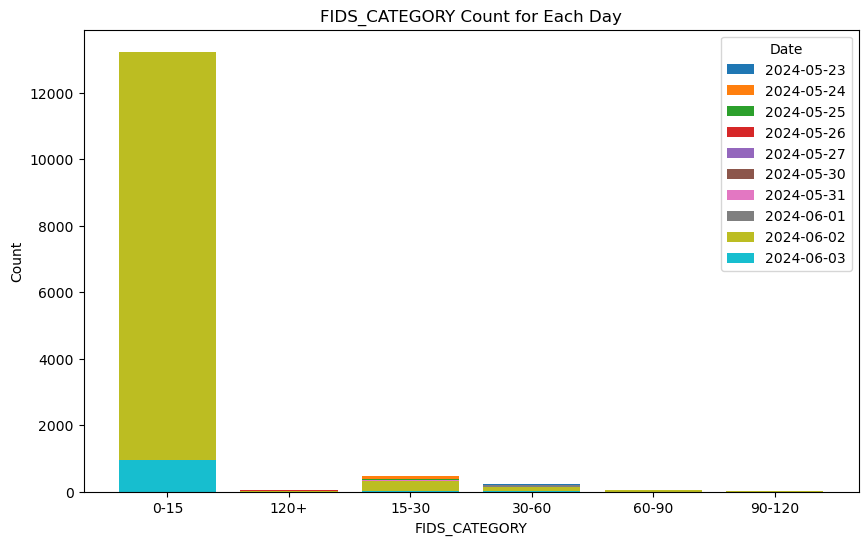

In [119]:
import pandas as pd
data = pd.read_csv("task_2.csv")

data['WINDOW_START_DATE'] = pd.to_datetime(data['WINDOW_START_DATE'])

data['DATE'] = data['WINDOW_START_DATE'].dt.date
grouped = data.groupby(['DATE', 'FIDS_CATEGORY']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
for date, group in grouped.groupby('DATE'):

    plt.bar(group['FIDS_CATEGORY'], group['count'], label=str(date))


plt.xlabel('FIDS_CATEGORY')
plt.ylabel('Count')
plt.title('FIDS_CATEGORY Count for Each Day')
plt.legend(title='Date')
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv("task_2.csv")

df['DATE'] = df['WINDOW_START_DATE'].dt.date
df['HOUR'] = df['WINDOW_START_DATE'].dt.hour

# Group by date, hour, and FIDS_CATEGORY, counting occurrences
grouped = df.groupby(['DATE', 'HOUR', 'FIDS_CATEGORY']).size().reset_index(name='count')

# Plotting the data
dates = grouped['DATE'].unique()

# Create a plot for each date
for date in dates:
    daily_data = grouped[grouped['DATE'] == date]
    
    plt.figure(figsize=(10, 6))
    
    # Plot each FIDS_CATEGORY as a separate line
    for category in daily_data['FIDS_CATEGORY'].unique():
        category_data = daily_data[daily_data['FIDS_CATEGORY'] == category]
        plt.plot(category_data['HOUR'], category_data['count'], label=f"Category {category}")
    
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(f'FIDS_CATEGORY Count for Each Hour on {date}')
    plt.legend(title='FIDS_CATEGORY')
    plt.grid(True)
    plt.show()

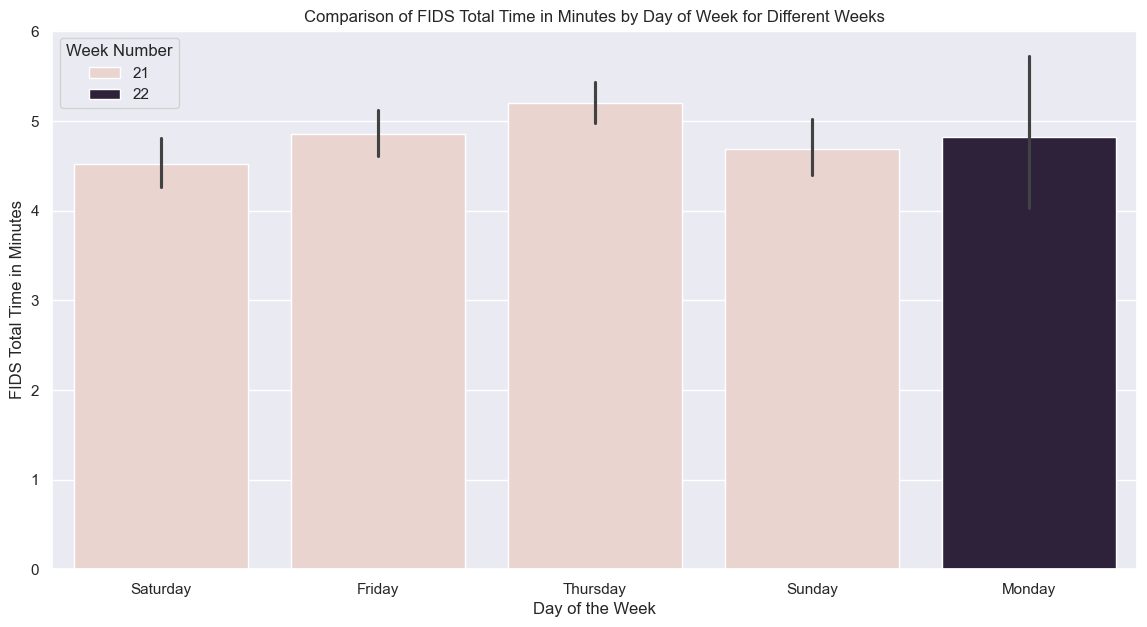

In [133]:
df = pd.read_csv("task_2.csv")
df['WINDOW_START_DATE'] = pd.to_datetime(df['WINDOW_START_DATE'])

# Filter data for the date ranges 23MAY-27MAY and 30JUNE-2JUNE
date_ranges = [("2024-05-23", "2024-05-27"), ("2024-06-30", "2024-07-02")]
filtered_df = pd.concat([df[(df['WINDOW_START_DATE'] >= start) & (df['WINDOW_START_DATE'] <= end)] for start, end in date_ranges])

# Extract the week number and day of the week
filtered_df['WEEK_NUM'] = filtered_df['WINDOW_START_DATE'].dt.isocalendar().week
filtered_df['DAY_OF_WEEK'] = filtered_df['WINDOW_START_DATE'].dt.day_name()

# Plotting the data
plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_df, x='DAY_OF_WEEK', y='FIDS_TOTAL_TIME_IN_MINUTE', hue='WEEK_NUM')
plt.title('Comparison of FIDS Total Time in Minutes by Day of Week for Different Weeks')
plt.xlabel('Day of the Week')
plt.ylabel('FIDS Total Time in Minutes')
plt.legend(title='Week Number')
plt.show()

<Axes: xlabel='FIDS_CATEGORY', ylabel='WINDOW_START_DATE'>

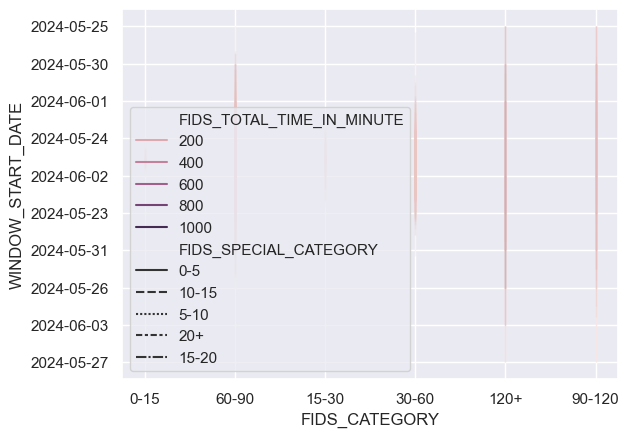

In [129]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data

# Plot the responses for different events and regions
plt.figure(figsize=(10, 6))

sns.lineplot(x="FIDS_CATEGORY", y="WINDOW_START_DATE",
             hue="FIDS_TOTAL_TIME_IN_MINUTE", style="FIDS_SPECIAL_CATEGORY",
             data=df)

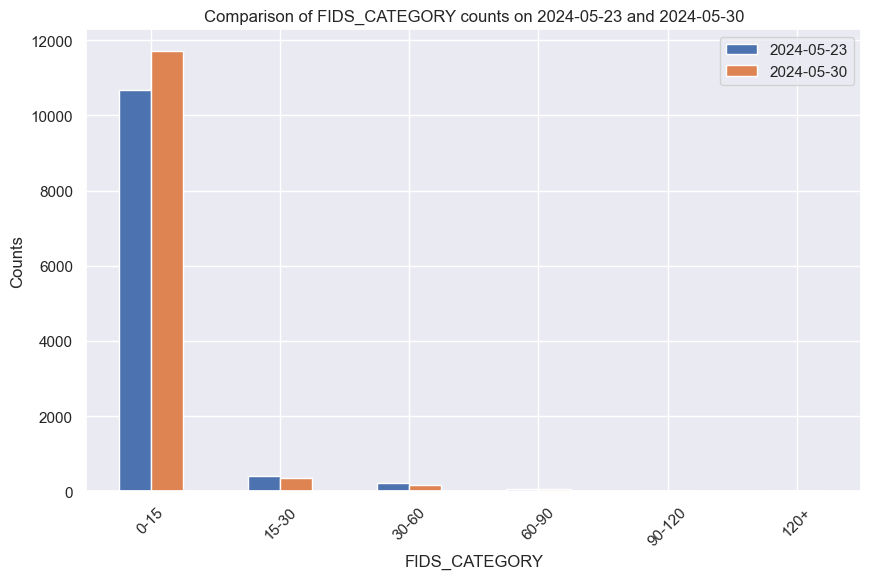

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("task_2.csv")
df['WINDOW_START_DATE'] = pd.to_datetime(df['WINDOW_START_DATE'])

# Define the date ranges
date_ranges = {
    '23MAY-27MAY': pd.date_range('2024-05-23', '2024-05-27'),
    '30MAY-02JUNE': pd.date_range('2024-05-30', '2024-06-02')
}

# Filter the data for each day
filtered_data = {}
for range_name, dates in date_ranges.items():
    for date in dates:
        filtered_data[date.strftime('%Y-%m-%d')] = df[df['WINDOW_START_DATE'] == date]
fids_counts = {}
for date, data in filtered_data.items():
    fids_counts[date] = data['FIDS_CATEGORY'].value_counts()

def plot_comparison(data1, data2, label1, label2, category_name):
    df_compare = pd.DataFrame({
        label1: data1,
        label2: data2
    }).fillna(0)
    
    df_compare.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Comparison of {category_name} counts on {label1} and {label2}')
    plt.xlabel(category_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot comparisons for each pair of days
if date1_str in fids_counts and date2_str in fids_counts:
    plot_comparison(fids_counts["2024-05-23"], fids_counts["2024-05-30"], "2024-05-23", "2024-05-30", 'FIDS_CATEGORY')

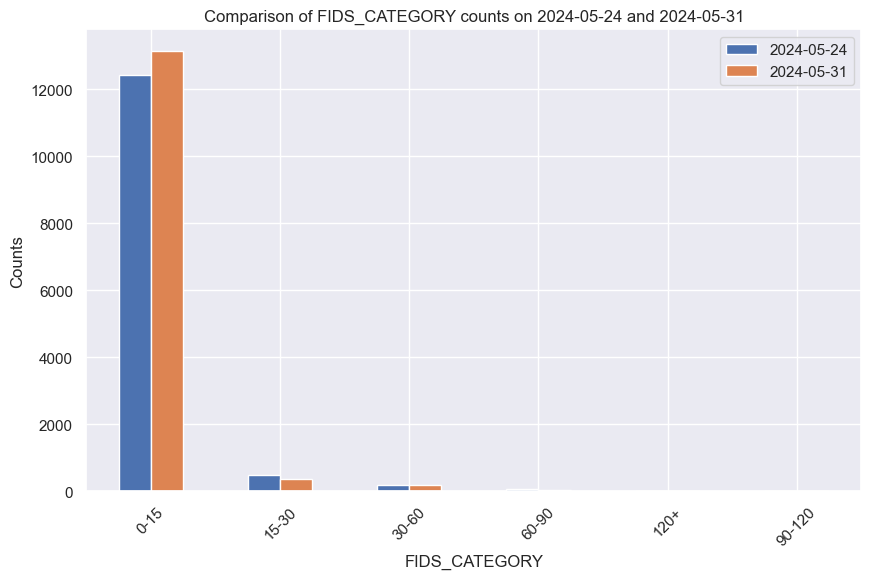

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("task_2.csv")
df['WINDOW_START_DATE'] = pd.to_datetime(df['WINDOW_START_DATE'])

# Define the date ranges
date_ranges = {
    '23MAY-27MAY': pd.date_range('2024-05-23', '2024-05-27'),
    '30MAY-02JUNE': pd.date_range('2024-05-30', '2024-06-02')
}

# Filter the data for each day
filtered_data = {}
for range_name, dates in date_ranges.items():
    for date in dates:
        filtered_data[date.strftime('%Y-%m-%d')] = df[df['WINDOW_START_DATE'] == date]
fids_counts = {}
for date, data in filtered_data.items():
    fids_counts[date] = data['FIDS_CATEGORY'].value_counts()

def plot_comparison(data1, data2, label1, label2, category_name):
    df_compare = pd.DataFrame({
        label1: data1,
        label2: data2
    }).fillna(0)
    
    df_compare.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Comparison of {category_name} counts on {label1} and {label2}')
    plt.xlabel(category_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot comparisons for each pair of days
if date1_str in fids_counts and date2_str in fids_counts:
    plot_comparison(fids_counts["2024-05-24"], fids_counts["2024-05-31"], "2024-05-24", "2024-05-31", 'FIDS_CATEGORY')

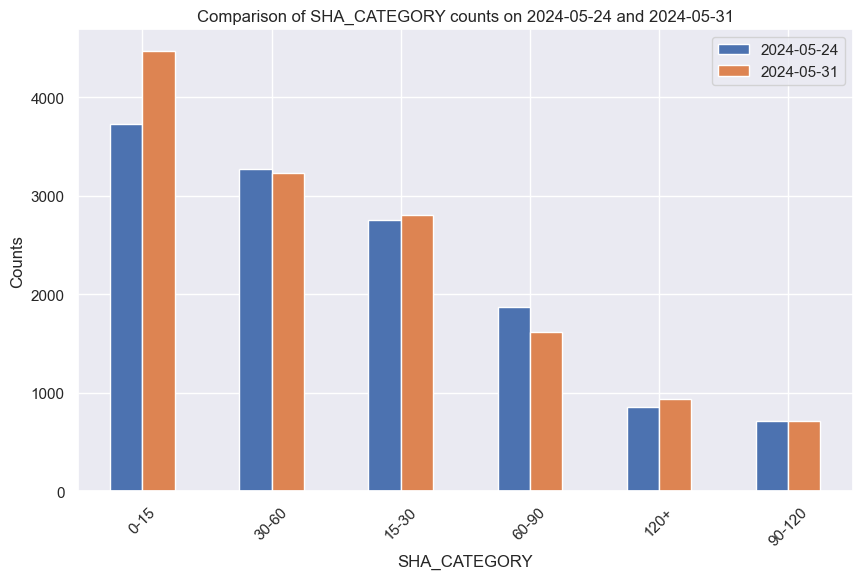

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("task_2.csv")

def plot_comparison(data1, data2, label1, label2, category_name):
    df_compare = pd.DataFrame({
        label1: data1,
        label2: data2
    }).fillna(0)
    
    df_compare.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Comparison of {category_name} counts on {label1} and {label2}')
    plt.xlabel(category_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot comparisons for each pair of days
plot_comparison(fids_counts["2024-05-24"], fids_counts["2024-05-31"], "2024-05-24", "2024-05-31", 'SHA_CATEGORY')

KeyError: '2024-05-23'

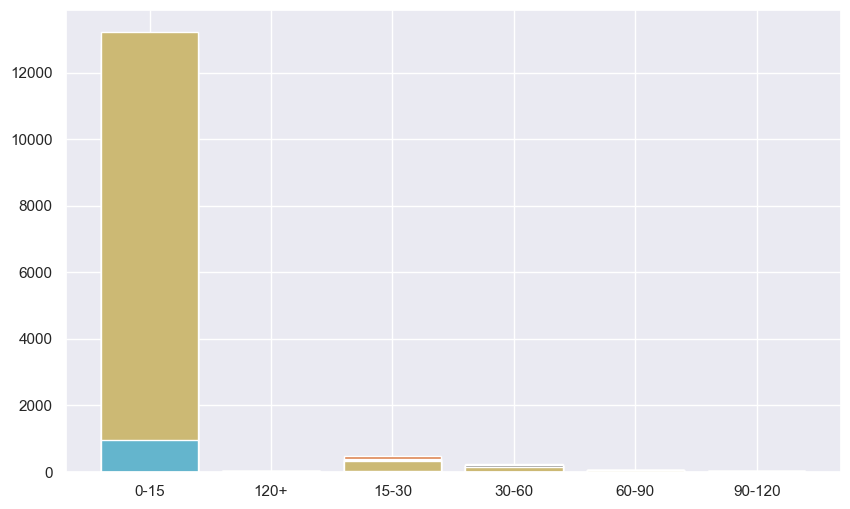

In [164]:
import pandas as pd
data = pd.read_csv("task_2.csv")

data['WINDOW_START_DATE'] = pd.to_datetime(data['WINDOW_START_DATE'])

data['DATE'] = data['WINDOW_START_DATE'].dt.date
grouped = data.groupby(['DATE', 'FIDS_CATEGORY']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
for date, group in grouped.groupby('DATE'):
    plt.bar(group['FIDS_CATEGORY'], group['count'], label=str(date))

df_compare = pd.DataFrame({
    "2024-05-23": grouped["2024-05-23"],
    "2024-05-30": grouped["2024-05-30"]
}).fillna(0)
    
df_compare.plot(kind='bar', figsize=(10, 6))

plt.xlabel('FIDS_CATEGORY')
plt.ylabel('Count')
plt.title('FIDS_CATEGORY Count for Each Day')
plt.legend(title='Date')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("task_2.csv")
df['WINDOW_START_DATE'] = pd.to_datetime(df['WINDOW_START_DATE'])

# Define the date ranges
date_ranges = {
    '23MAY-27MAY': pd.date_range('2024-05-23', '2024-05-27'),
    '30MAY-02JUNE': pd.date_range('2024-05-30', '2024-06-02')
}

# Filter the data for each day
filtered_data = {}
for range_name, dates in date_ranges.items():
    for date in dates:
        filtered_data[date.strftime('%Y-%m-%d')] = df[df['WINDOW_START_DATE'] == date]
fids_counts = {}
for date, data in filtered_data.items():
    fids_counts[date] = data['FIDS_CATEGORY'].value_counts()

def plot_comparison(data1, data2, label1, label2, category_name):
    df_compare = pd.DataFrame({
        label1: data1,
        label2: data2
    }).fillna(0)
    
    df_compare.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Comparison of {category_name} counts on {label1} and {label2}')
    plt.xlabel(category_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot comparisons for each pair of days
if date1_str in fids_counts and date2_str in fids_counts:
    plot_comparison(fids_counts["2024-05-24"], fids_counts["2024-05-31"], "2024-05-24", "2024-05-31", 'FIDS_CATEGORY')

   WINDOW_START_DATE FIDS_CATEGORY  count
0         2024-05-23          0-15  10679
1         2024-05-23          120+     23
2         2024-05-23         15-30    414
3         2024-05-23         30-60    232
4         2024-05-23         60-90     58
5         2024-05-23        90-120     24
6         2024-05-24          0-15  12416
7         2024-05-24          120+     19
8         2024-05-24         15-30    481
9         2024-05-24         30-60    195
10        2024-05-24         60-90     66
11        2024-05-24        90-120     16
12        2024-05-25          0-15  12223
13        2024-05-25          120+     21
14        2024-05-25         15-30    396
15        2024-05-25         30-60    185
16        2024-05-25         60-90     51
17        2024-05-25        90-120     12
18        2024-05-26          0-15  12895
19        2024-05-26          120+     37


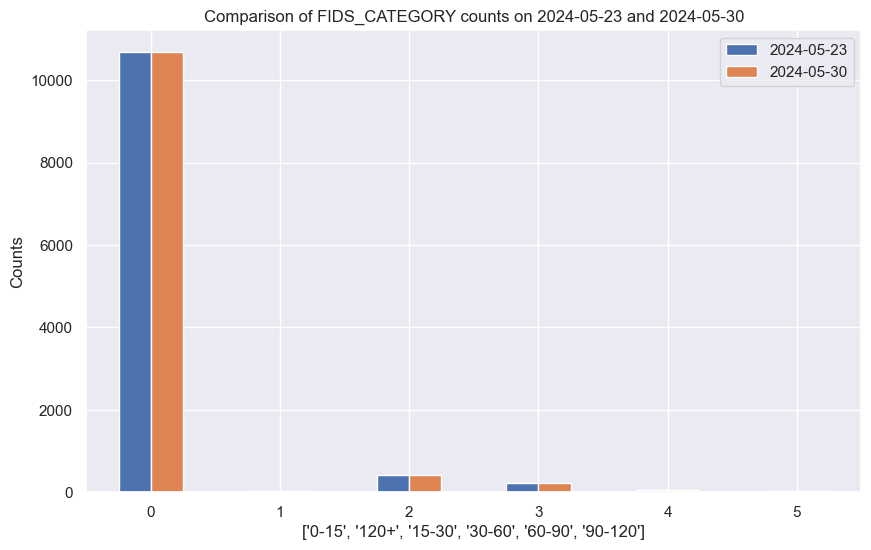

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("task_2.csv")
df['WINDOW_START_DATE'] = pd.to_datetime(df['WINDOW_START_DATE'])

# Filter the data for each day
filtered_data = {}
fids_counts = {}

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')
print(my_df.head(20))

def plot_comparison(data1, data2, label1, label2, category_name):
    df_compare = pd.DataFrame({
        label1: data1,
        label2: data2
    }).fillna(0)
    
    df_compare.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Comparison of {category_name} counts on {label1} and {label2}')
    plt.xlabel(["0-15","120+","15-30","30-60","60-90","90-120"])
    plt.ylabel('Counts')
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()

# Plot comparisons for each pair of days
plot_comparison(my_df[my_df['WINDOW_START_DATE']=="2024-05-23"]['count'], my_df[my_df['WINDOW_START_DATE']=="2024-05-23"]['count'], "2024-05-23", "2024-05-30", 'FIDS_CATEGORY')

   WINDOW_START_DATE FIDS_CATEGORY  count
0         2024-05-23          0-15  10679
2         2024-05-23         15-30    414
3         2024-05-23         30-60    232
4         2024-05-23         60-90     58
5         2024-05-23        90-120     24
1         2024-05-23          120+     23
6         2024-05-24          0-15  12416
8         2024-05-24         15-30    481
9         2024-05-24         30-60    195
10        2024-05-24         60-90     66
11        2024-05-24        90-120     16
7         2024-05-24          120+     19
12        2024-05-25          0-15  12223
14        2024-05-25         15-30    396
15        2024-05-25         30-60    185
16        2024-05-25         60-90     51
17        2024-05-25        90-120     12
13        2024-05-25          120+     21
18        2024-05-26          0-15  12895
20        2024-05-26         15-30    353


[Text(0.2, 0, '0-15'),
 Text(1.2, 0, '15-30'),
 Text(2.2, 0, '30-60'),
 Text(3.2, 0, '60-90'),
 Text(4.2, 0, '90-120'),
 Text(5.2, 0, '120+')]

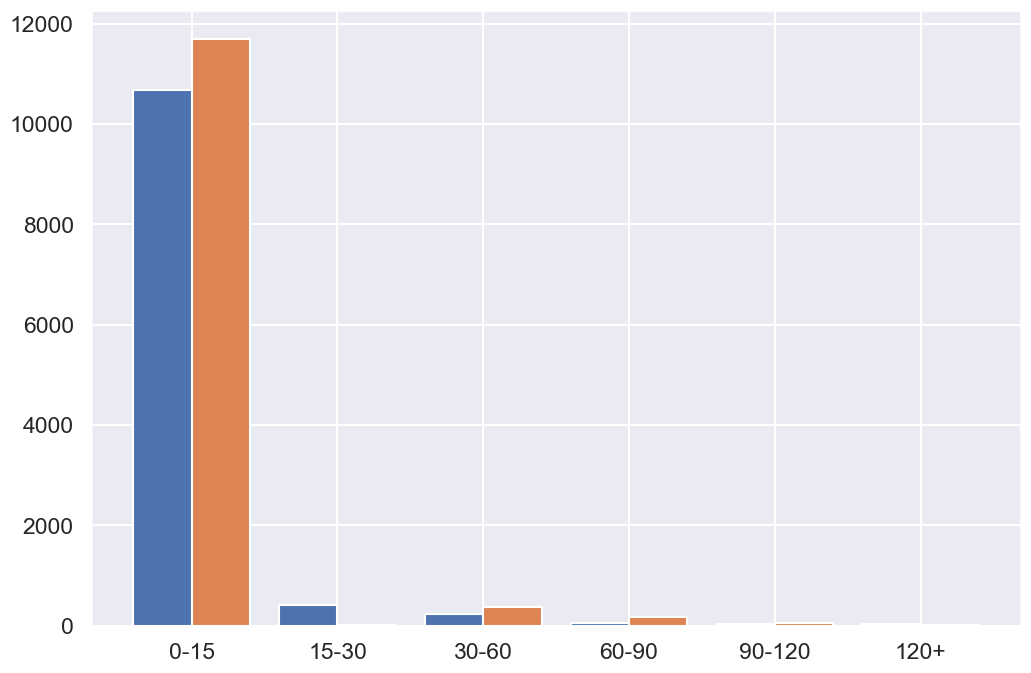

In [436]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')


category_mapping = {
    '0-15': 1,
    '15-30': 2,
    '30-60': 3,
    '60-90': 4,
    '90-120': 5,
    '120+': 6
}
my_df['CATEGORY_SORT_ORDER'] = my_df['FIDS_CATEGORY'].map(category_mapping)
my_df_sorted = my_df.sort_values(by=['WINDOW_START_DATE', 'CATEGORY_SORT_ORDER']).drop(columns=['CATEGORY_SORT_ORDER'])
print(my_df_sorted.head(20))








bar_width= 0.4
b1= ax.bar(x,my_df_sorted.loc[my_df_sorted['WINDOW_START_DATE']=='2024-05-23','count'],width=bar_width)
b2= ax.bar(x+bar_width,my_df.loc[my_df_sorted['WINDOW_START_DATE']=='2024-05-30','count'],width=bar_width)
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df_sorted.FIDS_CATEGORY.unique())



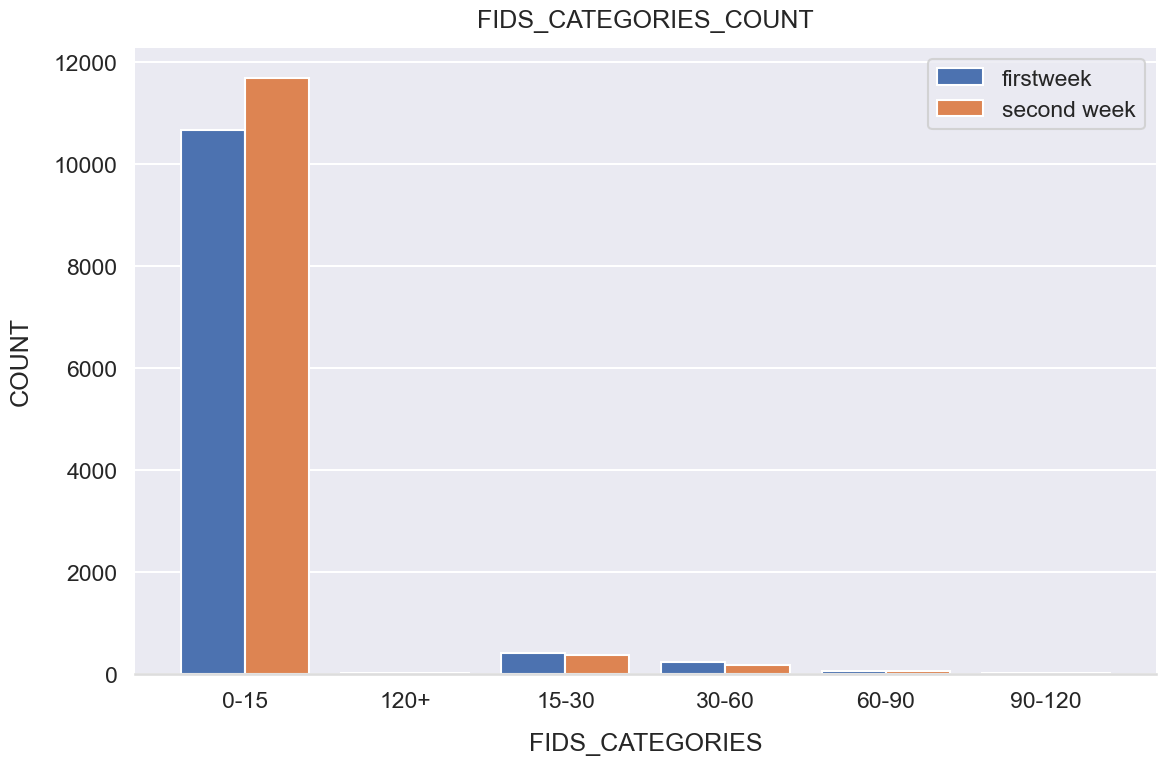

In [359]:
import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-23','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-30','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.FIDS_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('FIDS_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('FIDS_CATEGORIES_COUNT', pad=15)
fig.tight_layout()


Text(0.5, 1.0, 'FIDS_CATEGORIES_COUNT')

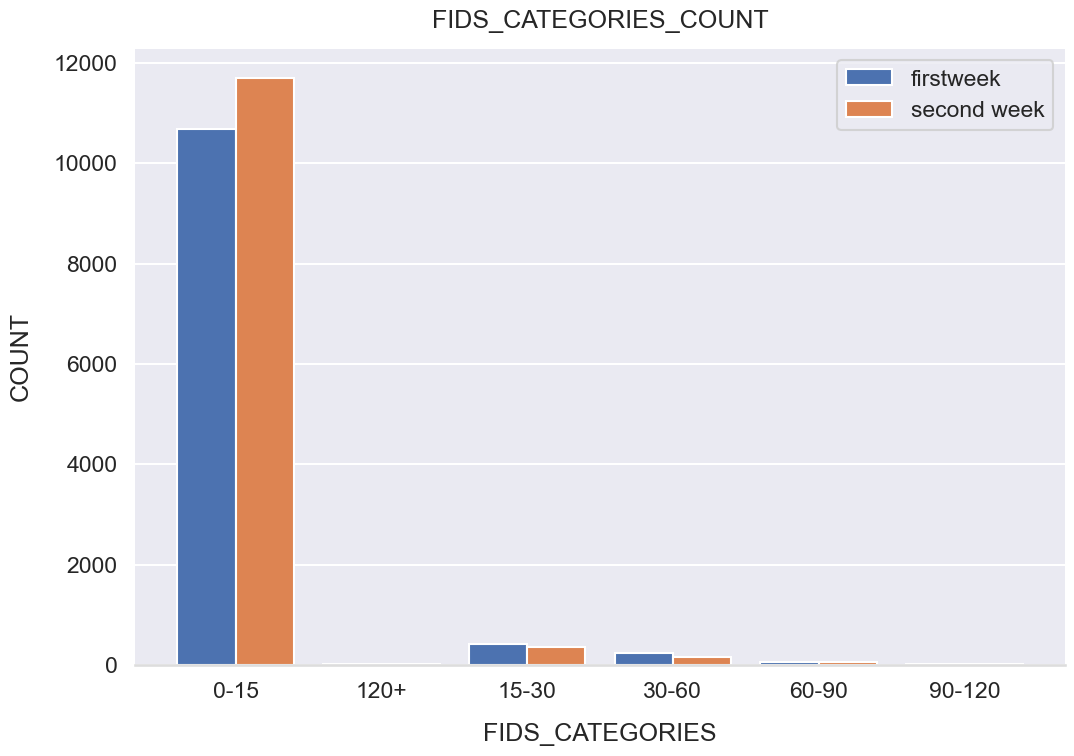

In [373]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-23','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-30','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.FIDS_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('FIDS_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('FIDS_CATEGORIES_COUNT', pad=15)



   WINDOW_START_DATE FIDS_CATEGORY  count
0         2024-05-23          0-15  10679
2         2024-05-23         15-30    414
3         2024-05-23         30-60    232
4         2024-05-23         60-90     58
5         2024-05-23        90-120     24
1         2024-05-23          120+     23
6         2024-05-24          0-15  12416
8         2024-05-24         15-30    481
9         2024-05-24         30-60    195
10        2024-05-24         60-90     66
11        2024-05-24        90-120     16
7         2024-05-24          120+     19
12        2024-05-25          0-15  12223
14        2024-05-25         15-30    396
15        2024-05-25         30-60    185
16        2024-05-25         60-90     51
17        2024-05-25        90-120     12
13        2024-05-25          120+     21
18        2024-05-26          0-15  12895
20        2024-05-26         15-30    353


[Text(0.2, 0, '0-15'),
 Text(1.2, 0, '120+'),
 Text(2.2, 0, '15-30'),
 Text(3.2, 0, '30-60'),
 Text(4.2, 0, '60-90'),
 Text(5.2, 0, '90-120')]

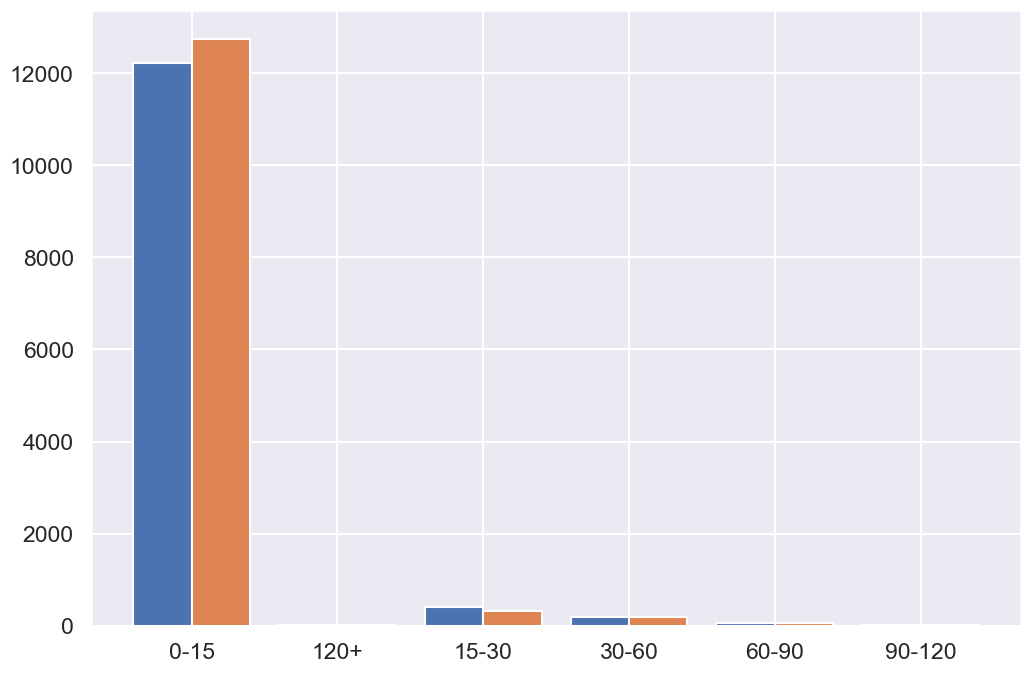

In [371]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')


category_mapping = {
    '0-15': 1,
    '15-30': 2,
    '30-60': 3,
    '60-90': 4,
    '90-120': 5,
    '120+': 6
}
my_df['CATEGORY_SORT_ORDER'] = my_df['FIDS_CATEGORY'].map(category_mapping)
my_df_sorted = my_df.sort_values(by=['WINDOW_START_DATE', 'CATEGORY_SORT_ORDER']).drop(columns=['CATEGORY_SORT_ORDER'])
print(my_df_sorted.head(20))








bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-23','count'],width=bar_width)
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-30','count'],width=bar_width)
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.FIDS_CATEGORY.unique())
z


# GRAPHICS FIDS

Text(0.5, 1.0, 'FIDS_CATEGORIES_COUNT')

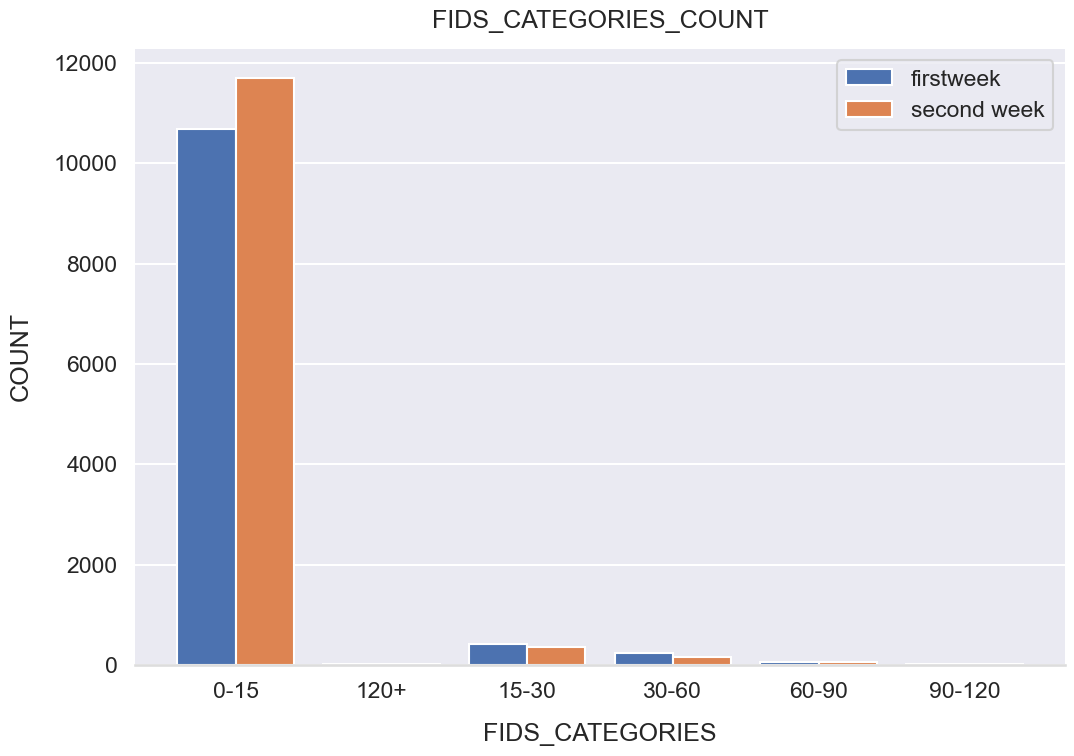

In [376]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-23','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-30','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.FIDS_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('FIDS_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('FIDS_CATEGORIES_COUNT', pad=15)



Text(0.5, 1.0, 'FIDS_CATEGORIES_COUNT')

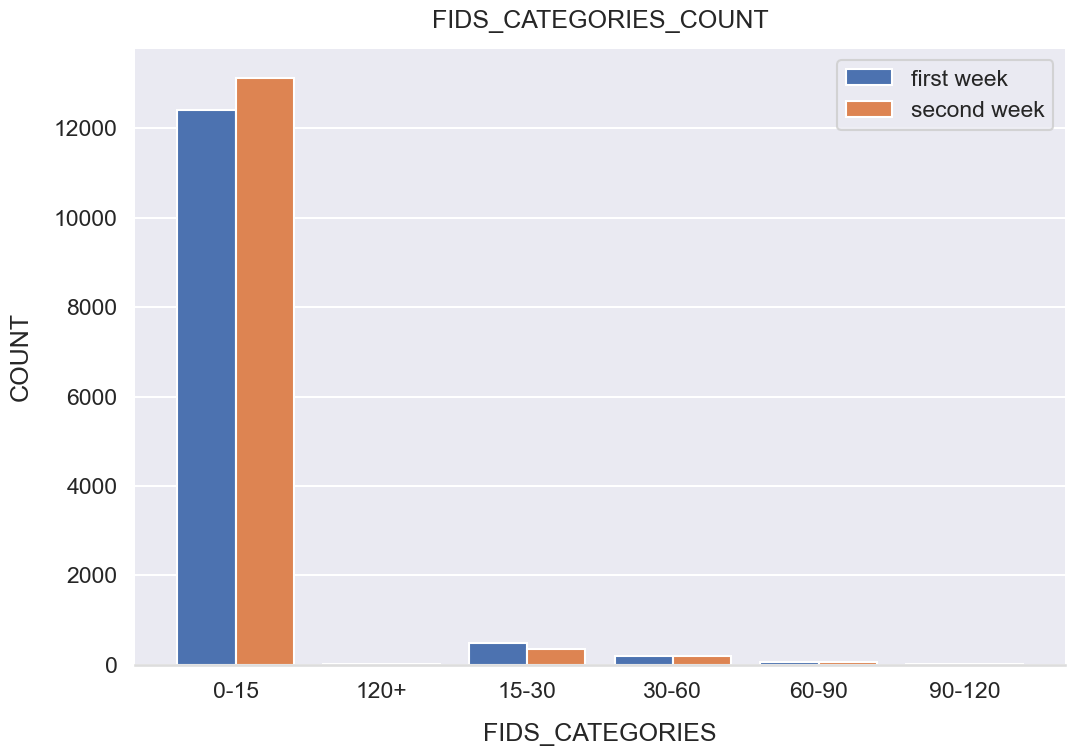

In [380]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-24','count'],width=bar_width,label='first week')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-31','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.FIDS_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('FIDS_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('FIDS_CATEGORIES_COUNT', pad=15)



Text(0.5, 1.0, 'FIDS_CATEGORIES_COUNT')

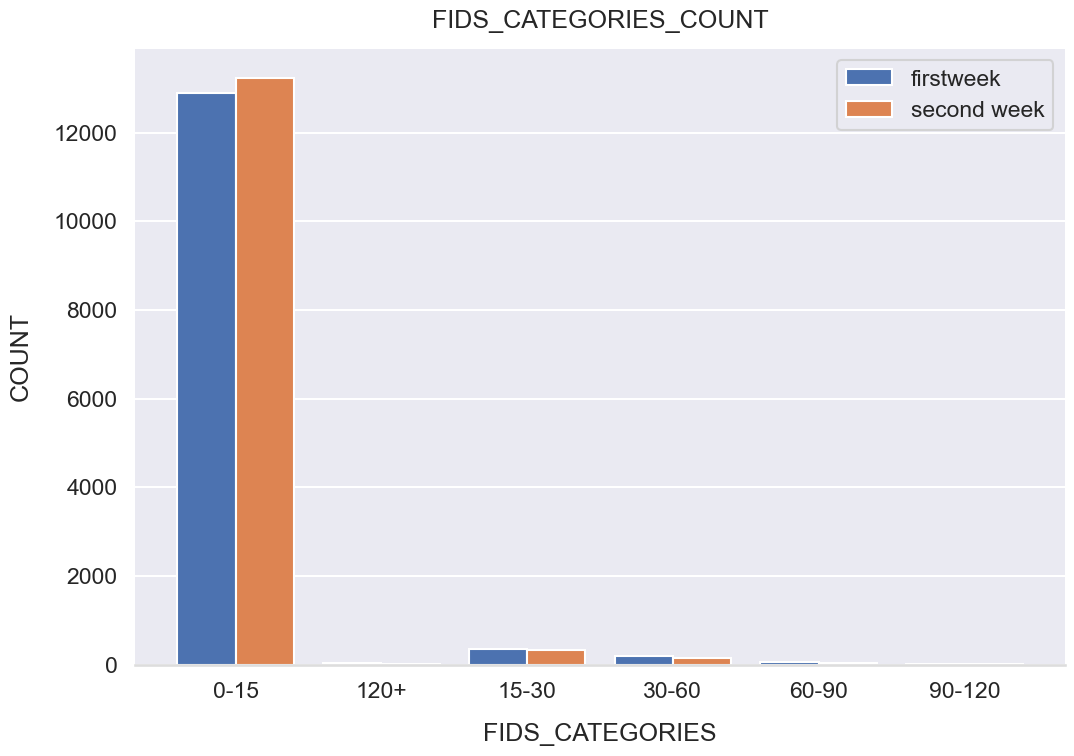

In [396]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['FIDS_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','FIDS_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-26','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-06-02','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.FIDS_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('FIDS_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('FIDS_CATEGORIES_COUNT', pad=15)



# SHOP GRAPHICS

Text(0.5, 1.0, 'SHOP_CATEGORIES_COUNT')

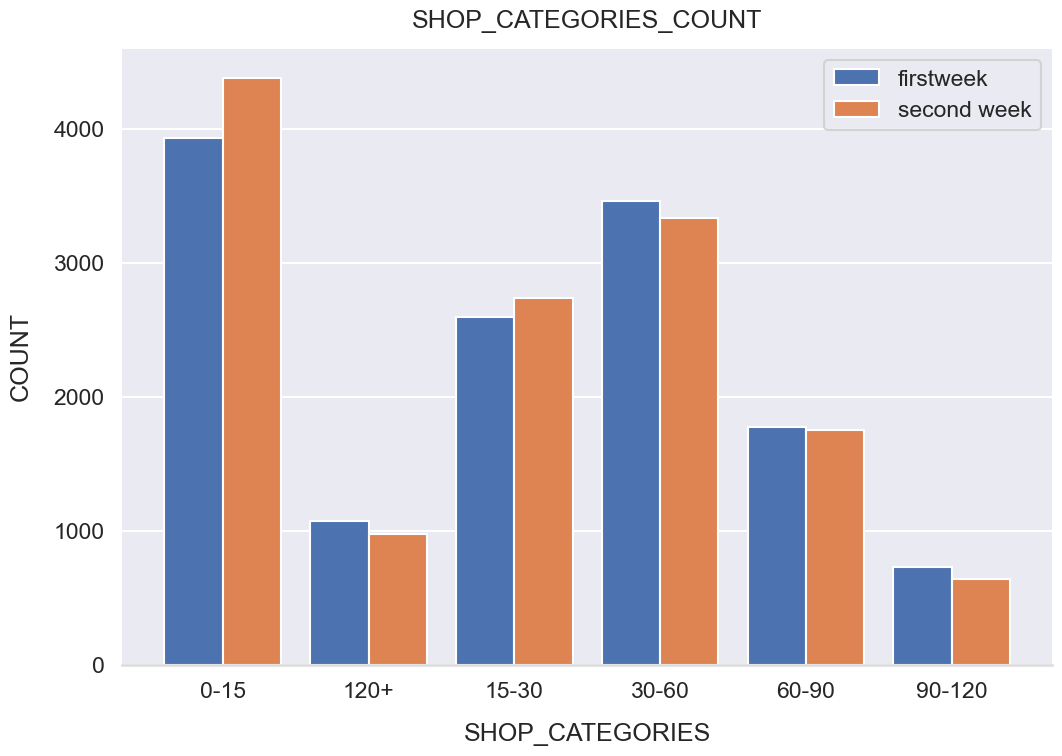

In [401]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','SHA_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-26','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-06-02','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.SHA_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHOP_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHOP_CATEGORIES_COUNT', pad=15)



Text(0.5, 1.0, 'SHOP_CATEGORIES_COUNT')

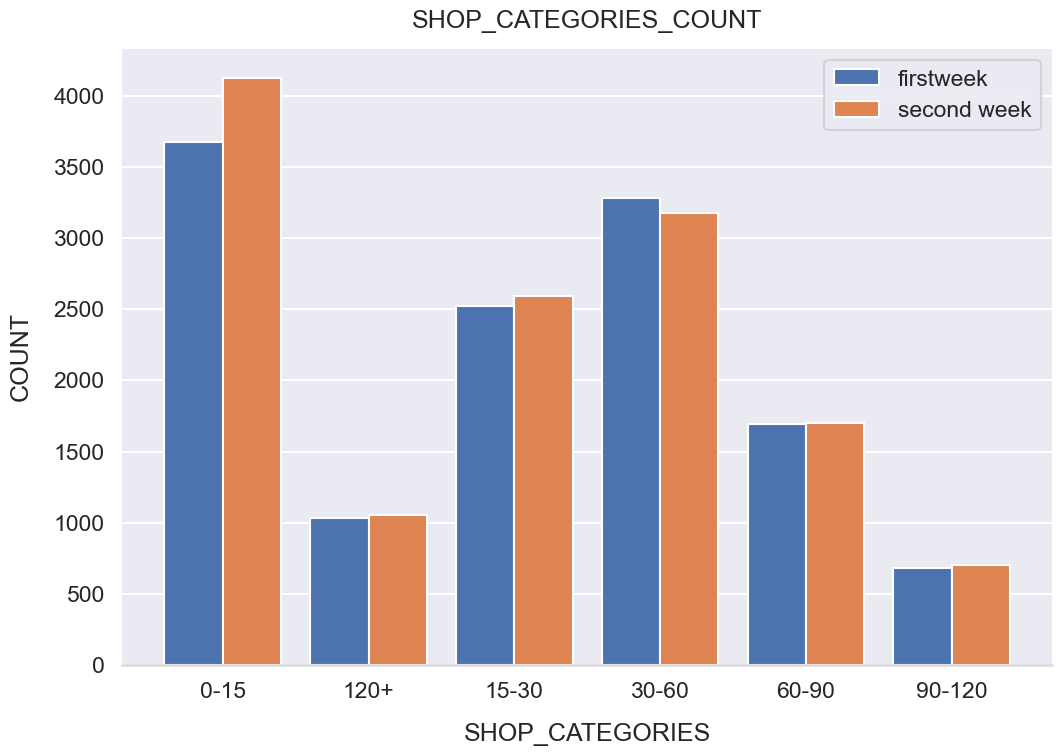

In [403]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','SHA_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-25','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-06-01','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.SHA_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHOP_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHOP_CATEGORIES_COUNT', pad=15)



Text(0.5, 1.0, 'SHOP_CATEGORIES_COUNT')

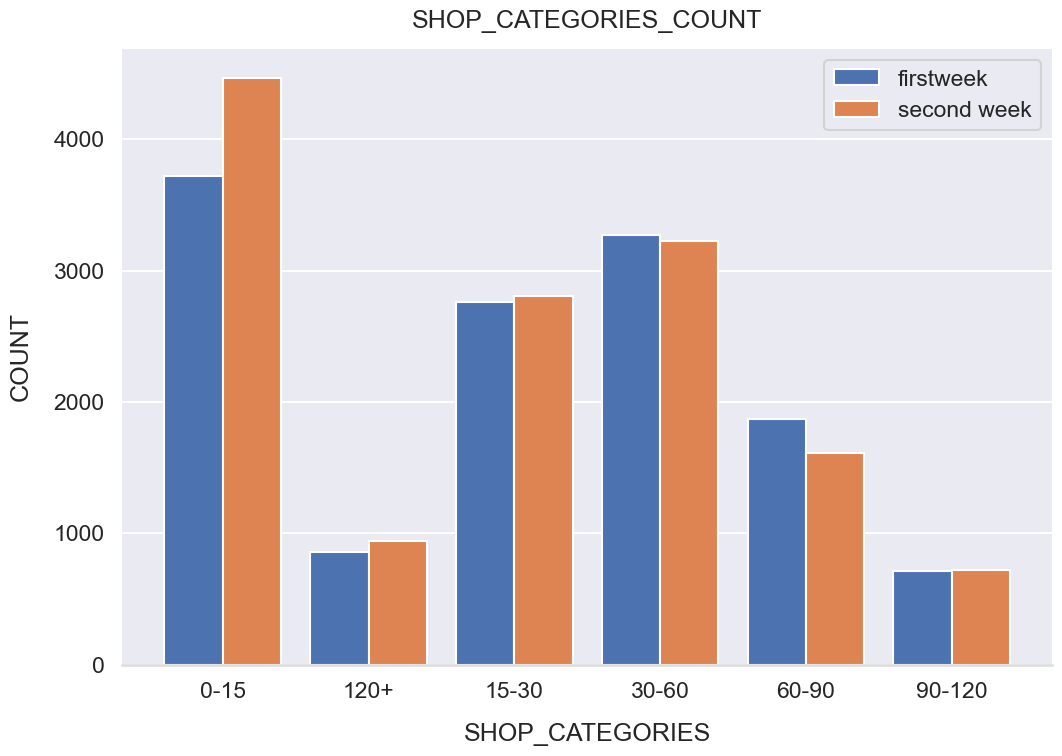

In [407]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','SHA_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-24','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-31','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.SHA_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHOP_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHOP_CATEGORIES_COUNT', pad=15)



# GRAPHICS EAST

Text(0.5, 1.0, 'SHA_EAST_CATEGORIES_COUNT')

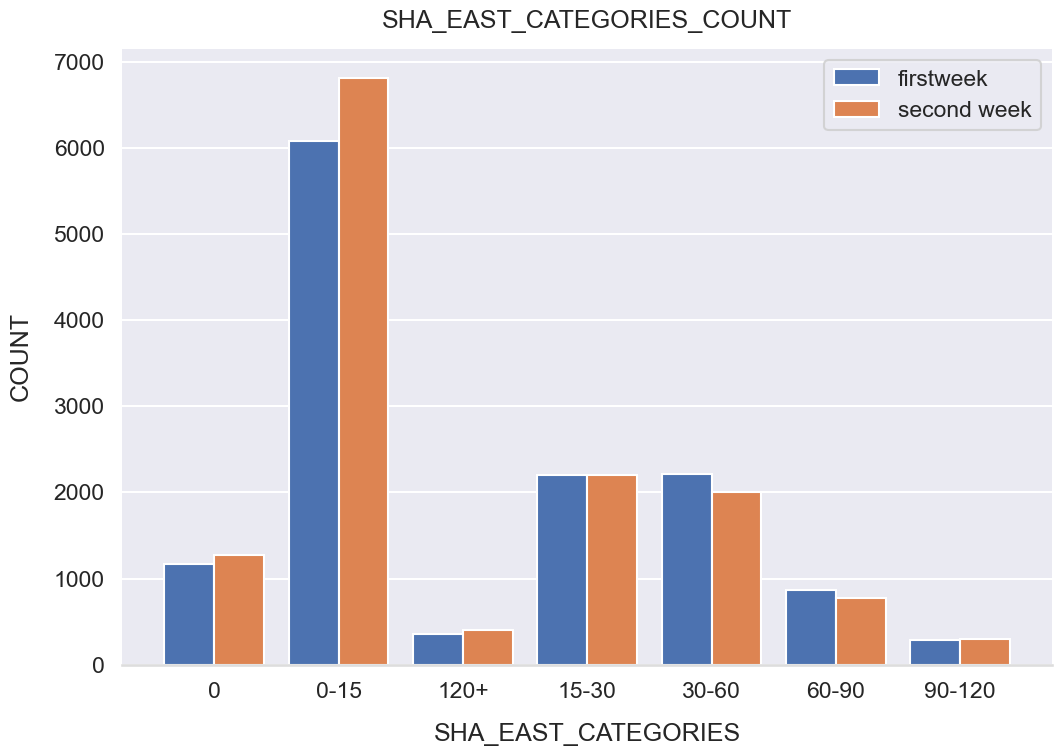

In [446]:


import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_EAST_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','SHA_EAST_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1= ax.bar(x,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-24','count'],width=bar_width,label='firstweek')
b2= ax.bar(x+bar_width,my_df.loc[my_df['WINDOW_START_DATE']=='2024-05-31','count'],width=bar_width,label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.SHA_EAST_CATEGORY.unique())
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHA_EAST_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHA_EAST_CATEGORIES_COUNT', pad=15)



# GRAPHICS WEST

12888
56    0.392148
57    0.411313
58    0.015596
59    0.108163
60    0.094196
61    0.036468
62    0.013423
Name: count, dtype: float64


Text(0.5, 1.0, 'SHA_WEST_CATEGORIES_COUNT')

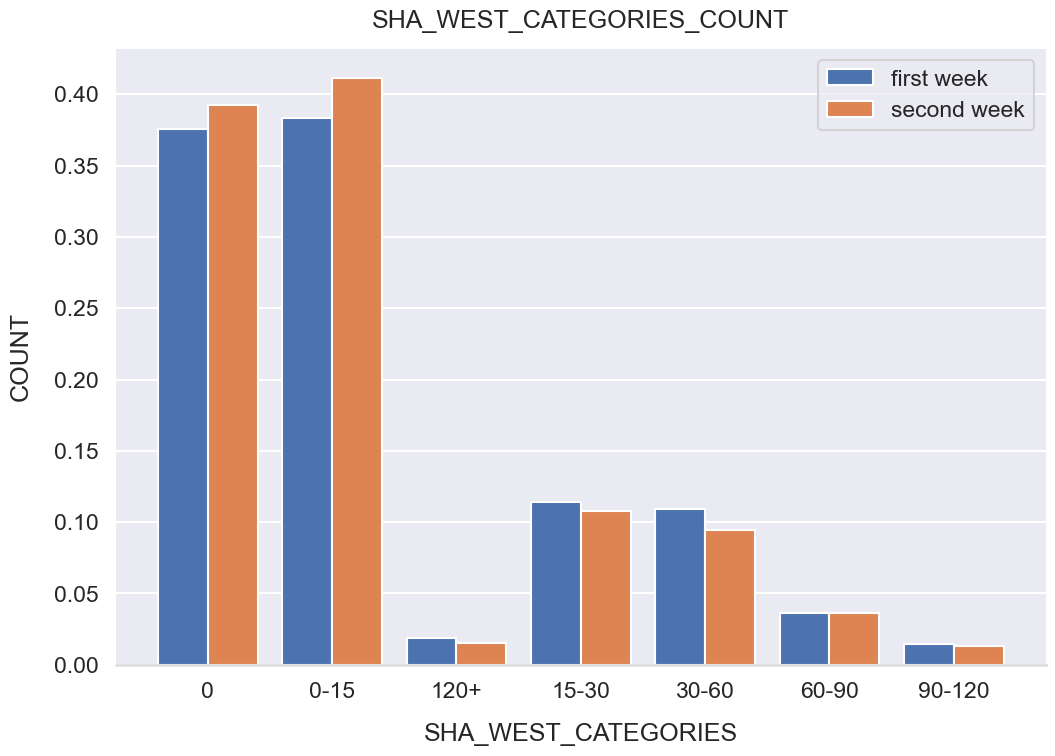

In [526]:
import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_WEST_CATEGORY'].unique()))


my_df_size = df.groupby('WINDOW_START_DATE').size().reset_index(name='count_size')
value = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-05-25', 'count_size'].values[0]
print(value)
  
my_df= df.groupby(['WINDOW_START_DATE','SHA_WEST_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1_counts = my_df.loc[my_df['WINDOW_START_DATE'] == '2024-05-26', 'count'] / value
b2_counts = my_df.loc[my_df['WINDOW_START_DATE'] == '2024-06-02', 'count']/ value
print(b2_counts)
# Plot bars for two specific dates
b1 = ax.bar(x, b1_counts, width=bar_width, label='first week')
b2 = ax.bar(x + bar_width, b2_counts, width=bar_width, label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.SHA_WEST_CATEGORY.unique())
ax.legend() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHA_WEST_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHA_WEST_CATEGORIES_COUNT', pad=15)



   WINDOW_START_DATE SHA_WEST_CATEGORY  count
1         2024-05-23              0-15   4388
3         2024-05-23             15-30   1159
4         2024-05-23             30-60   1052
5         2024-05-23             60-90    448
6         2024-05-23            90-120    183
2         2024-05-23              120+    195
0         2024-05-23                 0   4005
8         2024-05-24              0-15   4802
10        2024-05-24             15-30   1378
11        2024-05-24             30-60   1229
12        2024-05-24             60-90    438
13        2024-05-24            90-120    191
9         2024-05-24              120+    200
7         2024-05-24                 0   4955
15        2024-05-25              0-15   4886
17        2024-05-25             15-30   1363
18        2024-05-25             30-60   1295
19        2024-05-25             60-90    477
20        2024-05-25            90-120    198
16        2024-05-25              120+    272


[Text(0.2, 0, '0-15'),
 Text(1.2, 0, '15-30'),
 Text(2.2, 0, '30-60'),
 Text(3.2, 0, '60-90'),
 Text(4.2, 0, '90-120'),
 Text(5.2, 0, '120+'),
 Text(6.2, 0, '0')]

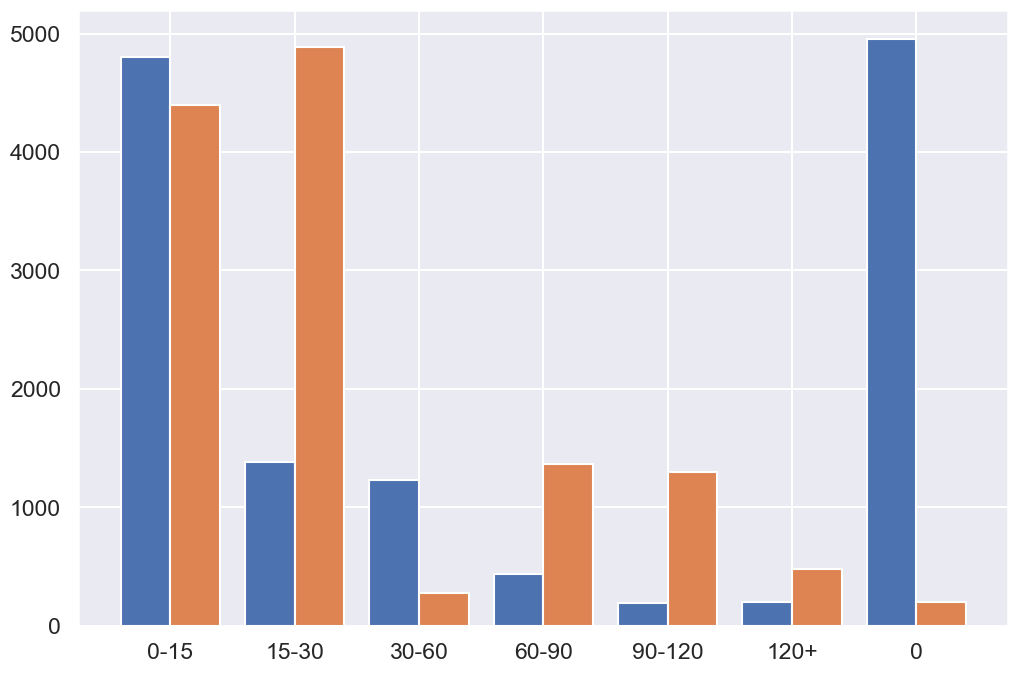

In [444]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_WEST_CATEGORY'].unique()))

my_df= df.groupby(['WINDOW_START_DATE','SHA_WEST_CATEGORY']).size().reset_index(name='count')


category_mapping = {
    '0-15': 1,
    '15-30': 2,
    '30-60': 3,
    '60-90': 4,
    '90-120': 5,
    '120+': 6
}
my_df['CATEGORY_SORT_ORDER'] = my_df['SHA_WEST_CATEGORY'].map(category_mapping)
my_df_sorted = my_df.sort_values(by=['WINDOW_START_DATE', 'CATEGORY_SORT_ORDER']).drop(columns=['CATEGORY_SORT_ORDER'])
print(my_df_sorted.head(20))








bar_width= 0.4
b1= ax.bar(x,my_df_sorted.loc[my_df_sorted['WINDOW_START_DATE']=='2024-05-24','count'],width=bar_width)
b2= ax.bar(x+bar_width,my_df.loc[my_df_sorted['WINDOW_START_DATE']=='2024-05-25','count'],width=bar_width)
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df_sorted.SHA_WEST_CATEGORY.unique())



12888
42    0.320143
44    0.201117
45    0.246741
46    0.131906
47    0.054702
43    0.082014
Name: count, dtype: float64


Text(0.5, 1.0, 'SHA_CATEGORIES_COUNT')

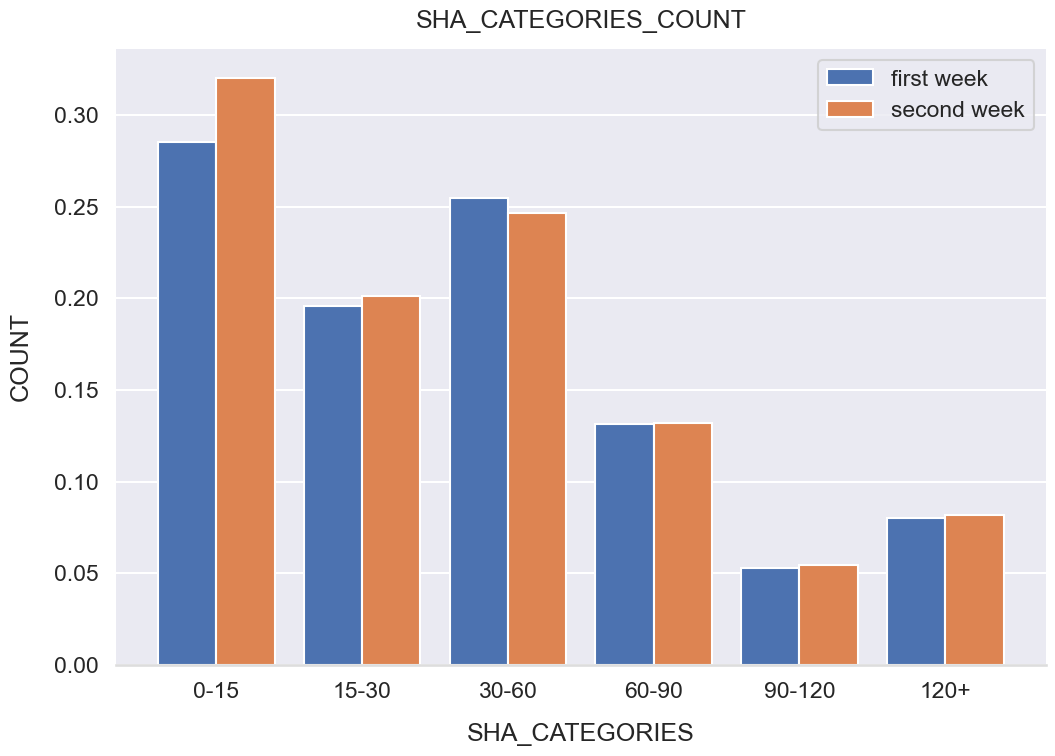

In [577]:
import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_CATEGORY'].unique()))


my_df_size = df.groupby('WINDOW_START_DATE').size().reset_index(name='count_size')
category_mapping = {
    '0-15': 1,
    '15-30': 2,
    '30-60': 3,
    '60-90': 4,
    '90-120': 5,
    '120+': 6
}

value = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-05-25', 'count_size'].values[0]
print(value)
  
my_df= df.groupby(['WINDOW_START_DATE','SHA_CATEGORY']).size().reset_index(name='count')

my_df['CATEGORY_SORT_ORDER'] = my_df['SHA_CATEGORY'].map(category_mapping)
my_df_sorted = my_df.sort_values(by=['WINDOW_START_DATE', 'CATEGORY_SORT_ORDER']).drop(columns=['CATEGORY_SORT_ORDER'])

bar_width= 0.4
b1_counts = my_df_sorted.loc[my_df['WINDOW_START_DATE'] == '2024-05-25', 'count'] / value
b2_counts = my_df_sorted.loc[my_df['WINDOW_START_DATE'] == '2024-06-01', 'count']/ value
print(b2_counts)
# Plot bars for two specific dates
b1 = ax.bar(x, b1_counts, width=bar_width, label='first week')
b2 = ax.bar(x + bar_width, b2_counts, width=bar_width, label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df_sorted.SHA_CATEGORY.unique())
ax.legend() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHA_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHA_CATEGORIES_COUNT', pad=15)



12888
42    0.320143
43    0.082014
44    0.201117
45    0.246741
46    0.131906
47    0.054702
Name: count, dtype: float64


Text(0.5, 1.0, 'SHA_CATEGORIES_COUNT')

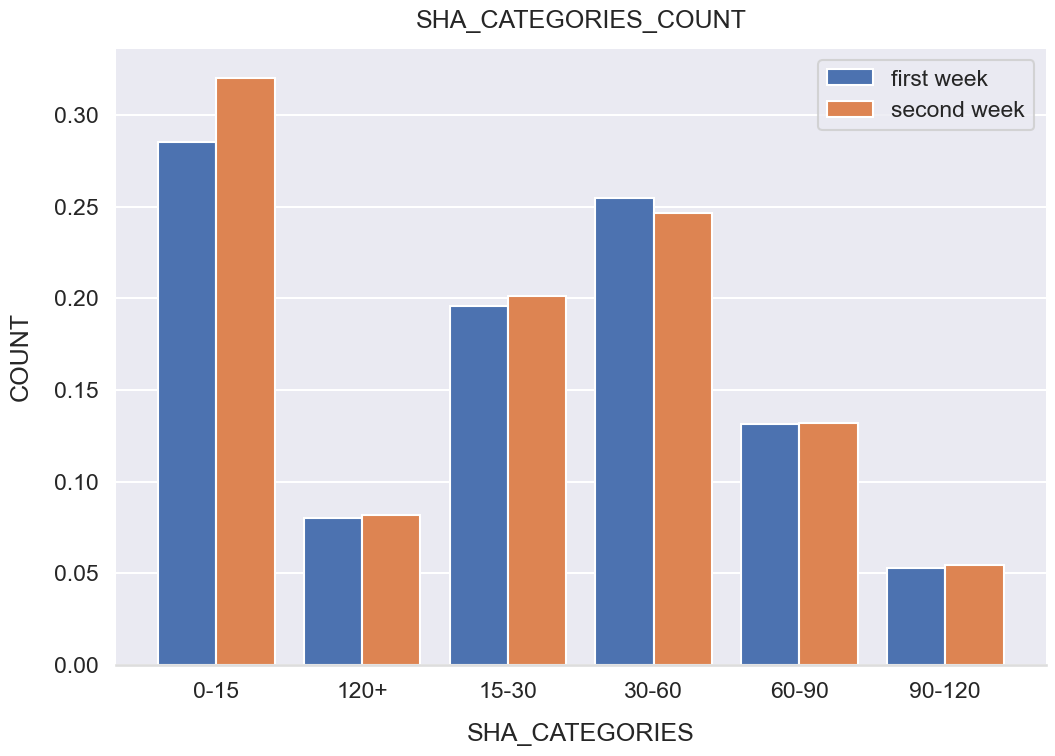

In [569]:
import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_CATEGORY'].unique()))


my_df_size = df.groupby('WINDOW_START_DATE').size().reset_index(name='count_size')



value = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-05-25', 'count_size'].values[0]
print(value)
  
my_df= df.groupby(['WINDOW_START_DATE','SHA_CATEGORY']).size().reset_index(name='count')
bar_width= 0.4
b1_counts = my_df.loc[my_df['WINDOW_START_DATE'] == '2024-05-25', 'count'] / value
b2_counts = my_df.loc[my_df['WINDOW_START_DATE'] == '2024-06-01', 'count']/ value
print(b2_counts)
# Plot bars for two specific dates
b1 = ax.bar(x, b1_counts, width=bar_width, label='first week')
b2 = ax.bar(x + bar_width, b2_counts, width=bar_width, label='second week')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df.SHA_CATEGORY.unique())
ax.legend() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHA_CATEGORIES', labelpad=15)
ax.set_ylabel('COUNT', labelpad=15)
ax.set_title('SHA_CATEGORIES_COUNT', pad=15)



13564
48    0.316941
50    0.198233
51    0.241182
52    0.126820
53    0.046208
49    0.070616
Name: count, dtype: float64


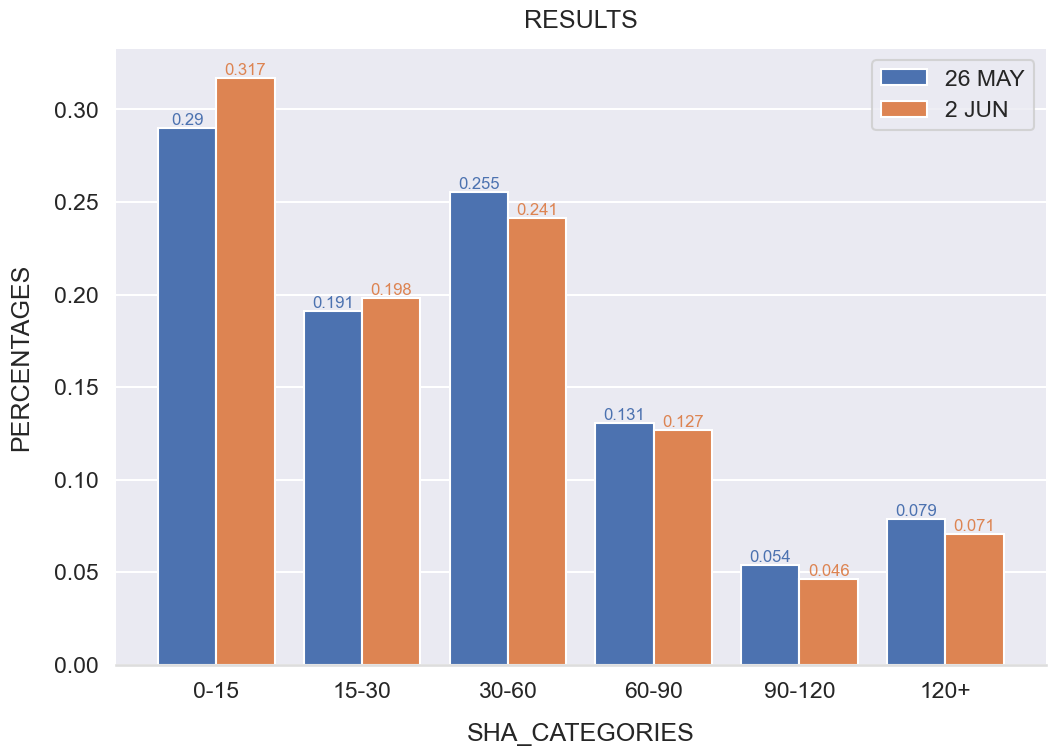

In [635]:
import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_CATEGORY'].unique()))


my_df_size = df.groupby('WINDOW_START_DATE').size().reset_index(name='count_size')
category_mapping = {
    '0-15': 1,
    '15-30': 2,
    '30-60': 3,
    '60-90': 4,
    '90-120': 5,
    '120+': 6
}

value = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-05-26', 'count_size'].values[0]
value_second = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-06-02', 'count_size'].values[0]

print(value)
  
my_df= df.groupby(['WINDOW_START_DATE','SHA_CATEGORY']).size().reset_index(name='count')

my_df['CATEGORY_SORT_ORDER'] = my_df['SHA_CATEGORY'].map(category_mapping)
my_df_sorted = my_df.sort_values(by=['WINDOW_START_DATE', 'CATEGORY_SORT_ORDER']).drop(columns=['CATEGORY_SORT_ORDER'])

bar_width= 0.4
b1_counts = my_df_sorted.loc[my_df['WINDOW_START_DATE'] == '2024-05-26', 'count'] / value
b2_counts = my_df_sorted.loc[my_df['WINDOW_START_DATE'] == '2024-06-02', 'count']/ value_second
print(b2_counts)
# Plot bars for two specific dates
b1 = ax.bar(x, b1_counts, width=bar_width, label='26 MAY')
b2 = ax.bar(x + bar_width, b2_counts, width=bar_width, label='2 JUN')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df_sorted.SHA_CATEGORY.unique())
ax.legend() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHA_CATEGORIES', labelpad=15)
ax.set_ylabel('PERCENTAGES', labelpad=15)
ax.set_title('RESULTS', pad=15)

# You can just append this to the code above.

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{round(bar_value,3):,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

In [637]:
import datetime

# Dictionary containing tasks with descriptions, reminders, and due dates
tasks = {
    "Task 1": {"description": "Finish project report", "reminder": "10:00 
AM", "due_date": "2023-03-15"},
    "Task 2": {"description": "Meet with John at 2 PM", "reminder": None, 
"due_date": "2023-03-16"},
    "Task 3": {"description": "Buy groceries from Whole Foods", 
"reminder": "8:00 AM", "due_date": "2023-03-17"}
}

# Function to print the daily to-do list
def print_tasks():
    today = datetime.date.today()
    for task, details in tasks.items():
        if details["due_date"] == str(today):
            print(f"Task: {task}, Description: {details['description']}")
            if details["reminder"]:
                print(f"Reminder: {details['reminder']}")
            else:
                print("No reminder set")

# Print the daily to-do list
print_tasks()


SyntaxError: unterminated string literal (detected at line 5) (4009957833.py, line 5)

11430
35    0.082738
36    0.477184
38    0.163771
39    0.159792
40    0.064713
41    0.022653
37    0.029149
Name: count, dtype: float64


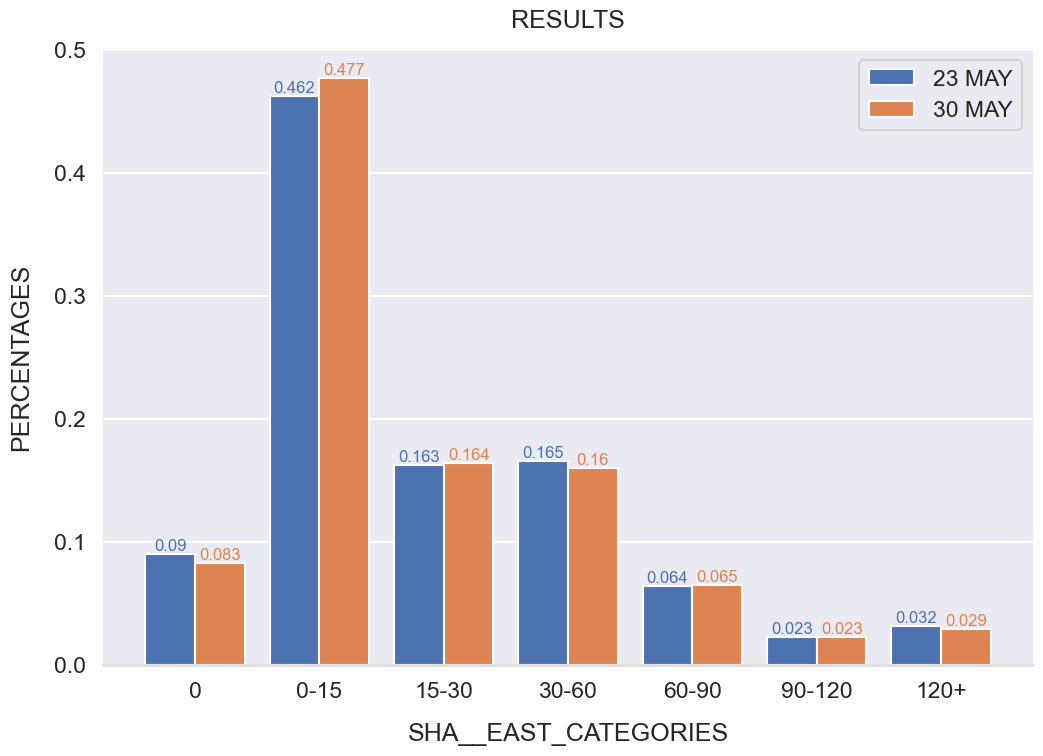

In [670]:
import seaborn as sns
sns.set_context('talk')
df = pd.read_csv("task_2.csv")
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df['SHA_EAST_CATEGORY'].unique()))


my_df_size = df.groupby('WINDOW_START_DATE').size().reset_index(name='count_size')
category_mapping = {
    '0':1,
    '0-15': 2,
    '15-30': 3,
    '30-60': 4,
    '60-90': 5,
    '90-120': 6,
    '120+': 7
}

value = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-05-23', 'count_size'].values[0]
value_second = my_df_size.loc[my_df_size['WINDOW_START_DATE'] == '2024-05-30', 'count_size'].values[0]

print(value)
  
my_df= df.groupby(['WINDOW_START_DATE','SHA_EAST_CATEGORY']).size().reset_index(name='count')

my_df['CATEGORY_SORT_ORDER'] = my_df['SHA_EAST_CATEGORY'].map(category_mapping)
my_df_sorted = my_df.sort_values(by=['WINDOW_START_DATE', 'CATEGORY_SORT_ORDER']).drop(columns=['CATEGORY_SORT_ORDER'])

bar_width= 0.4
b1_counts = my_df_sorted.loc[my_df['WINDOW_START_DATE'] == '2024-05-23', 'count'] / value
b2_counts = my_df_sorted.loc[my_df['WINDOW_START_DATE'] == '2024-05-30', 'count']/ value_second
print(b2_counts)
# Plot bars for two specific dates
b1 = ax.bar(x, b1_counts, width=bar_width, label='23 MAY')
b2 = ax.bar(x + bar_width, b2_counts, width=bar_width, label='30 MAY')
ax.set_xticks(x+ bar_width/2)
ax.set_xticklabels(my_df_sorted.SHA_EAST_CATEGORY.unique())
ax.legend() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='white')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('SHA__EAST_CATEGORIES', labelpad=15)
ax.set_ylabel('PERCENTAGES', labelpad=15)
ax.set_title('RESULTS', pad=15)

# You can just append this to the code above.

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{round(bar_value,3):,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)